# AMAT 502: Modern Computing for Mathematicians
## Lecture 17 - Principal Component Analysis (PCA)
### University at Albany SUNY

# Topics for Today
- Recap of the ML Tree
- Motivating Example for PCA
- Review of Linear Algebra Concepts
- Review of Probability
- PCA
- Projections

## Machine Learning (ML) Algorithms

The four main branches of ML are:

1. Supervised Learning
    - Regression
    - Classification
2. Unsupervised Learning
    - Clustering
    - Dimensionality Reduction
    
<center>
    
![ML Tree](ML-tree.jpeg)

<i> Image taken from <a href="https://medium.com/better-programming/the-data-science-interview-study-guide-c3824cb76c2e">The Data Science Interview Study Guide</a></i>

</center>

# Dimensionality Reduction

Today we will examine our first dimensionality reduction technique, Principal Component Analysis (PCA):

* PCA is a statistical tool for analyzing data sets using linear algebra.

* It helps reduce dimension by identifying which variables are the most correlated, and which variables are the most *significant*. By significant we mean which variables best describe variation in the data set.
    




## Is this Two Dimensional Data?

Here we have a scatter plot in 2D, but it looks likely the data lies along a 1D subspace.
<center>
<img src="PCA1.png" alt="PCA" width="400" />
</center>

## Correlated Data Has Lower Dimensionality

Here the second coordinate/feature is directly correlated with the first coordinate/feature. This means we still have our data concentrated around the graph of some function. 

This makes PCA as a dimensionality reduction technique closely related to regression.

<center>
<img src="PCA2.png" alt="PCA" width="400"/>
</center>

# Linear Algebra Review

* The **trace** is the sum of the diagonal entries of a matrix. The **determinant** determines whether a matrix is invertible or not. Both of these quantities are invariants of linear operators on finite dimensional vector spaces. This means that they are invariant under change of basis, since a vector space does not come with a choice of basis.

* A matrix $A$ has an **eigenvalue** if there exists a non-zero vector $v\neq 0$, an *eigenvector*, and a scalar value $\lambda$, called the *eigenvalue*, such that

$$ Av = \lambda v $$

* A matrix is **diagonalizable** if there is some invertible matrix $C$ so that $$C^{-1}A C = D$$ and $D$ only has non-zero entries along the diagonal.

* A matrix $A$ is **symmetric** if $A = A^T$ where $A^T$ is the transpose of $A$.

* A matrix $P$ is **orthogonal** if $P P^T = I_n$ is the identity matrix. This means the transpose is the inverse


## The Spectral Theorem

Having eigenvalues is intimately connected with diagonalizability. Indeed an $n\times n$ matrix is diagonalizable if and only if it has $n$ linearly independent eigenvectors.

For symmetric matrices, even more is true.

**Spectral Theorem:** If $A$ is symmetric, then $A$ is **orthogonally diagonalizable**, which means there exists an orthogonal matrix $P$ such that $$A = PDP^T $$

The entries of $D$ are given by the (necessarily real) eigenvalues $\lambda_1, \lambda_2, ... , \lambda_n$ and the entries of $P$ are populated using the (necessarily orthogonal) eigvenvectors $v_1,..., v_n$.

## Symmetric = Orthgonally Diagonalizable

The Spectral Theorem implies that being symmetric is **sufficient** for being orthogonally diagonalizable, but in fact we can show it is necessary as well.

Assume that $$A = PDP^T $$ where $D$ is a diagonal and $P$ is orthogonal. 

$$ A^T = (PDP^T)^T = (P^T)^TD^TP^T = PDP^T = A $$

Note that here we used the fact that transposes reverse order of matrices $(XY)^T=Y^TX^T$.

## Making Real Symmetric Matrices

**Proposition:** If $A$ is a real $m x n$ matrix, then $AA^T$ and $A^TA$ are symmetric matrices.

**Question:** What are the dimensions of $AA^T$ and $A^TA$?

## More Observations

**Proposition:** The matrices $AA^T$ and $A^TA$ have the same set of eigenvalues.

**Why?** If $v$ is an eigenvector of $AA^T$ then $A^Tv$ is an eigenvector of $A^T A$, indeed: 

Since $(AA^T) v =\lambda v$, then

$$(A^T A) A^T v = \lambda A^T v$$

## Linear Algebra in Numpy

Let's play around with these results in Numpy

In [1]:
import numpy as np
# First generate a random matrix, sampled uniformly from unit [0,1)
A = np.random.rand(200,3) 
# GOAL: Find the eigenvalues of AA^T
# First check the dimensions
print(A.shape)
print(A.T.shape)
print(A.dot(A.T).shape)

(200, 3)
(3, 200)
(200, 200)


In [2]:
A.dot(A.T)

array([[1.17755437, 0.58543886, 0.5062495 , ..., 0.81330094, 1.0404068 ,
        1.04470686],
       [0.58543886, 1.25211615, 0.12430663, ..., 1.40335703, 0.94142494,
        0.41886742],
       [0.5062495 , 0.12430663, 0.26389238, ..., 0.18103448, 0.51254878,
        0.511905  ],
       ...,
       [0.81330094, 1.40335703, 0.18103448, ..., 1.64482428, 1.00972267,
        0.55609165],
       [1.0404068 , 0.94142494, 0.51254878, ..., 1.00972267, 1.60904073,
        1.08322659],
       [1.04470686, 0.41886742, 0.511905  , ..., 0.55609165, 1.08322659,
        1.02062032]])

In [3]:
A.T.dot(A)

array([[61.34571261, 53.62664612, 45.94760155],
       [53.62664612, 73.85089654, 54.16528587],
       [45.94760155, 54.16528587, 68.50204451]])

In [4]:
E1 = np.linalg.eig(A.T.dot(A))
E1

(array([170.85821902,  13.27710493,  19.56332971]),
 array([[-0.54167986, -0.64437009, -0.5397871 ],
        [-0.61774768,  0.74065221, -0.26423873],
        [-0.57006204, -0.19031942,  0.79925452]]))

In [5]:
E2 = np.linalg.eig(A.dot(A.T))
E2

(array([ 1.70858219e+02+0.00000000e+00j,  1.95633297e+01+0.00000000e+00j,
         1.32771049e+01+0.00000000e+00j,  1.13514798e-14+0.00000000e+00j,
        -9.95297245e-15+0.00000000e+00j,  5.90676115e-15+7.07568987e-15j,
         5.90676115e-15-7.07568987e-15j,  4.45918796e-15+7.62159899e-15j,
         4.45918796e-15-7.62159899e-15j,  8.22228476e-15+7.91509668e-16j,
         8.22228476e-15-7.91509668e-16j,  7.38064020e-15+2.55844996e-15j,
         7.38064020e-15-2.55844996e-15j, -1.37867883e-15+8.30845248e-15j,
        -1.37867883e-15-8.30845248e-15j, -1.85423070e-16+8.28885012e-15j,
        -1.85423070e-16-8.28885012e-15j,  2.63289030e-15+7.05363076e-15j,
         2.63289030e-15-7.05363076e-15j, -6.56931168e-15+3.74913347e-15j,
        -6.56931168e-15-3.74913347e-15j, -5.49141934e-15+5.06473417e-15j,
        -5.49141934e-15-5.06473417e-15j, -3.11391047e-15+6.75006145e-15j,
        -3.11391047e-15-6.75006145e-15j,  5.60747416e-15+4.11993073e-15j,
         5.60747416e-15-4.11993073e-15

## Review of Basic Probability and Statistics Concepts

Suppose we're measuring a single variable $A$ such as height of randomly selected individuals $n$ times. Let $a_1, ... , a_n$ be the $n$ measurements. Then we have that the sample

- **Mean:** $\mu_A = \dfrac{1}{n}(a_1 + \cdots + a_n)$

- **Population Variance:** $Var(A)$ = $\dfrac{1}{n}((a_1 - \mu_A)^2 + \cdots + (a_n - \mu_A)^2)$

- **Sample Variance:** $Var_s(A)$ = $\dfrac{1}{n-1}((a_1 - \mu_A)^2 + \cdots + (a_n - \mu_A)^2)$

***Nota Bene:*** The sample variance is an unbiased estimator of the population variance. It is not so easy to prove that dividing by $n-1$ is the right thing to do!

### Basic Probability: Mean ( = Expectation)

Recall that the mean $\mu$ is also called the **expected value** or **expectation** of a random variable $X$.

- In the discrete case, $X$ has a probability mass function (PMF) $p(x)$, and the expectation is $$E(X) = \sum_x x p(x)$$
- In the continuous case, $X$ has a probability density function (PDF) $f(x)$, and the expectation is $$E(X) = \int x f(x)dx$$



### Basic Probability: Variance and Covariance

The **variance** is just the expected value of the function that measures squared deviation from the mean, i.e. $$Var(X) = E[(X-\mu_X)^2]$$

Recall from probability that if $X$ and $Y$ are random variables then
$$ Var(X+Y) = Var(X) + 2Cov(X,Y) + Var(Y)$$

Here the **covariance** of two random variables $X$ and $Y$ are given by the expectation of the product of devaiations from the mean, i.e.
$$Cov(X,Y) = E((X-\mu_X)(Y-\mu_Y))$$

### Sample Statistics

If $A$ is a sample drawn from a random variable $X$ with unknown mean, such as height, and $B$ is a sample drawn from a random variable $Y$, such as weight, also with an unknown mean, then the **sample covariance of $A$ and $B$** is

$$Cov_s(A,B) = \dfrac{1}{n - 1}((a_1 - \mu_A)(b_1 - \mu_B) + \cdots + (a_n - \mu_A)(b_n - \mu_B))$$

# The PCA Pipeline

## Matrix Representation

First, in order to apply PCA to our dataset, we want to store our data of $m$ samples, each having $n$ features, as an $m x n$ matrix:

$$D = 
\begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
\vdots & \vdots & \vdots  & \vdots\\
x_{m,1} & x_{m,2} & \cdots & x_{1,n}
\end{bmatrix} 
$$

Each row represents a person (= a sample), and each row entry represents a feature of that person, i.e., height, weight, etcetera.

Consequently we can think of this matrix as $m$ draws of $n$ random variables $F_1$,...,$F_n$, representing the features we're observing.

## Mean Centering

The first step in PCA is to re-center our data. This is sometimes called **mean centering** of the data. In this case, we take the mean of the rows (as a single **row vector**):

$$\vec{\mu} = \dfrac{1}{m}\sum \vec{x}_i =(\mu_1,\mu_2,\ldots,\mu_n)$$

We re-center our dataset by subtracting the mean from our data matrix, 
$$B = D - [\; \vec{\mu_1}\;|\;\cdots\;|\;\vec{\mu_n} \;].$$

Here we view $\vec{\mu}_j$ as the column vector with all entries equal to $\mu_j$

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

mice = pd.DataFrame({'M1':[10,6], 'M2':[11,4], 'M3': [8,5], 'M4': [3,3], 'M5': [2,2.8], 'M6': [1,1]}, index = ['Gene 1','Gene 2'])
#mice
data = mice.transpose()
data

,Gene 1,Gene 2
M1,10.0,6.0
M2,11.0,4.0
M3,8.0,5.0
M4,3.0,3.0
M5,2.0,2.8
M6,1.0,1.0


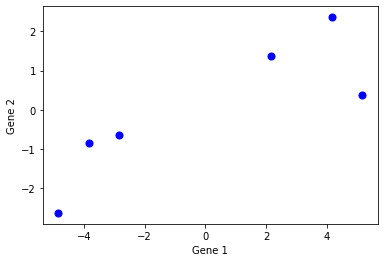

In [11]:
## Now we'll transpose and "mean center" our data
mean = data.mean()
#mean
B = data - mean
B
B.plot.scatter(x = 'Gene 1', y = 'Gene 2', s = 50,c = 'blue')

## Mean Centered Data

Before going to the next step, let's recall what the entries of our new matrix $B$ look like:

$$
B = 
\begin{bmatrix}
x_{1,1} - \mu_1 & x_{1,2} - \mu_2 & \cdots & x_{1,n} - \mu_n \\
x_{2,1} - \mu_1 & x_{2,2} - \mu_2 & \cdots & x_{2,n} - \mu_n \\
\vdots & \vdots & \vdots  & \vdots\\
x_{m,1} - \mu_1 & x_{m,2} - \mu_2 & \cdots & x_{m,n} - \mu_n \\
\end{bmatrix}
$$

## The Covariance Matrix

Next, we build an $n x n$ covariance matrix $C$ using our matrix $B$:

$$C = \dfrac{1}{n - 1}B^T B$$

Recall that $C$ is symmetric. 

Therefore, by the **Spectral Theorem,** we are able to orthogonally diagonalize our covariance matrix.

**Question:** Why use this $B^T B$ versus $BB^T$?

## Applying the Spectral Theorem to Get Principal Components

The Spectral Theorem tells us that $C$ has a basis of eigenvectors, so that tells us that we have $n$ (not necessarily unique) real eigenvalues $\lambda_i$. We now want to *order* this list of eigenvalues:

$$ \lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_n > 0 $$

with corresponding eigenvectors $\vec{u}_1, \cdots, \vec{u}_n$. These $\vec{u}_i$ are called the **principal components** of our data set, when viewed in feature space $\mathbb{R}^n$.

In [12]:
import numpy as np
C = np.dot(B.T, B)
eig = np.linalg.eig(C)
eig

(array([106.42006121,   4.04660545]), array([[ 0.94171069, -0.33642381],
        [ 0.33642381,  0.94171069]]))

## Percent Variation in the Data

Let $T = \sum \lambda_i$ be the trace of $B^T B$. Note that

$$T = Var(F_1) + Var(F_2) + \cdots + Var(F_n)$$

This is also equal to the trace of its diagonalization, so we know that

$$T = \lambda_1 + \lambda_2 + \cdots + \lambda_n.$$

Then we can make the following observations:

* Since $\lambda_1$ is the largest eigenvalue associated to the first principal component $\vec{u}_1$, then $\frac{\lambda_1}{T}$ is the fraction of how much the component $\vec{u}_1$ contributes to the total variance. Therefore, $\vec{u}_1$ points in the "most significant" direction.

* The vector that points in the "most significant direction" that is orthogonal to $\vec{u}_1$ is $\vec{u}_2$, the second principal component, and so on...

The first principal component is [0.94171069 0.33642381] with eigenvalue contribution 0.96
The second principal component is [-0.33642381  0.94171069] with eigenvalue contribution 0.04


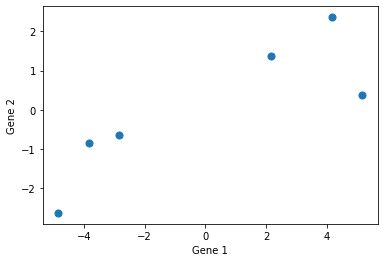

In [13]:
T = eig[0][0] + eig[0][1]
print("The first principal component is",eig[1][:,0], 'with eigenvalue contribution', 
      round(eig[0][0]/T,2))
print("The second principal component is",eig[1][:,1], 'with eigenvalue contribution', 
      round(eig[0][1]/T, 2))
B.plot.scatter(x = 'Gene 1', y = 'Gene 2', s = 50)

### PCA Summary

* Collect $n$ samples of $m$-dimensional data. Compute the mean $\mu$ and subtract it from your data matrix, and compute the covariance matrix  of your data with itself.

* Find the eigenvalues of the covariance matrix and order them. Then find their associated eigenvectors to get your list of **principal components**

* Interpret results

* Project data onto the first $k$ principal components

### Projection onto a subspace

Suppose $v_1,\ldots, v_k$ are the first $k$ eigenvectors, ordered by eigenvalue size. Denote by $W$ the subspace spanned by these vectors

Let $A$ be the matrix whose columns are $v_1,\ldots,v_k$. Then for any vector $x$
$$A(A^TA)^{-1}A^T x = \text{proj}_W(x)$$
is the projection of $x$ onto the subspace $W$.

https://textbooks.math.gatech.edu/ila/projections.html

[[-0.94171069 -0.33642381]
 [ 0.33642381 -0.94171069]]


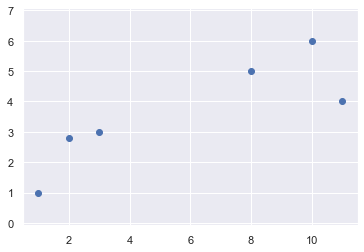

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
mice = np.array([[10,6],[11,4],[8,5], [3,3], [2,2.8], [1,1]])
plt.scatter(mice[:,0],mice[:,1])
plt.axis('equal')
pca = PCA(n_components = 2)
pca.fit(mice)
print(pca.components_)

In [15]:
pca = PCA(n_components = 1)
pca.fit(mice)
mice_pca = pca.transform(mice)

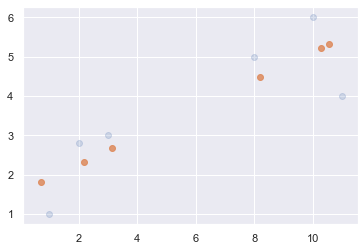

In [16]:
mice_New = pca.inverse_transform(mice_pca)
mice_New
plt.scatter(mice[:,0],mice[:,1], alpha = 0.2)
plt.scatter(mice_New[:,0],mice_New[:,1], alpha = 0.8)

In [ ]:
#def pca(X = np.array([]), no_dims = 5):
#    (n, d) = X.shape;
#    X = X - np.tile(np.mean(X, 0), (n, 1));
#    (l, M) = np.linalg.eig(np.dot(X.T, X));
#    Y = np.dot(X, M[:,0:no_dims]);
#    return Y